## Using areacellO

## CMIP6 model data using Pangeo catalog

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

In [2]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Ofx'], 
                 variable_id=['areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r10i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r9i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r8i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r6i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r11i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200408


In [5]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
areacello = dset_dict[list(dset_dict.keys())[0]]

In [7]:
# choose one member_id
# remove excess dimensions like member IDs
areacello = areacello.isel(member_id = 0).squeeze()
areacello

<xarray.Dataset>
Dimensions:     (y: 294, x: 362, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U9 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(294, 362), meta=np.ndarray>
Attributes: (12/47)
    institution:             CNRM (Centre National de Recherches Meteorologiq...
    xios_commit:             1442-shuffle
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f2
    contact:                 contact.cmip@meteo.fr
    ...                      ...
    data_specs_version:      01.00.21
    parent_experiment_id:    piControl
    sub_experiment:          none
    activity_id:             CMIP
    nemo_gelato_commit:      49095b3accd5d4c_6524fe19b00467a
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

## Check
* are the areacello values the same for all the ensembles


In [55]:
import numpy as np
for mi in range(9):
    for mj in range(9):
        diff = (np.abs(areacello.isel(member_id = mi).areacello - areacello.isel(member_id = mj).areacello)).mean(dim=['y','x']).values
        print(mi,mj,diff)

# areacello.isel(member_id = 1).areacello.plot.pcolormesh()

0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 0.0
1 6 0.0
1 7 0.0
1 8 0.0
2 0 0.0
2 1 0.0
2 2 0.0
2 3 0.0
2 4 0.0
2 5 0.0
2 6 0.0
2 7 0.0
2 8 0.0
3 0 0.0
3 1 0.0
3 2 0.0
3 3 0.0
3 4 0.0
3 5 0.0
3 6 0.0
3 7 0.0
3 8 0.0
4 0 0.0
4 1 0.0
4 2 0.0
4 3 0.0
4 4 0.0
4 5 0.0
4 6 0.0
4 7 0.0
4 8 0.0
5 0 0.0
5 1 0.0
5 2 0.0
5 3 0.0
5 4 0.0
5 5 0.0
5 6 0.0
5 7 0.0
5 8 0.0
6 0 0.0
6 1 0.0
6 2 0.0
6 3 0.0
6 4 0.0
6 5 0.0
6 6 0.0
6 7 0.0
6 8 0.0
7 0 0.0
7 1 0.0
7 2 0.0
7 3 0.0
7 4 0.0
7 5 0.0
7 6 0.0
7 7 0.0
7 8 0.0
8 0 0.0
8 1 0.0
8 2 0.0
8 3 0.0
8 4 0.0
8 5 0.0
8 6 0.0
8 7 0.0
8 8 0.0


## Select only the Greenland Sea area

In [8]:
GLarea = areacello.areacello.where((areacello.lat>=70) & (areacello.lat<=85) & (areacello.lon <= 10) & (areacello.lon >= -10), drop = True)
#GLarea.plot.contourf()

In [23]:
# Dont need to do this anymore
#GLarea_mean = GLarea.mean(dim = 'member_id', keep_attrs = True)

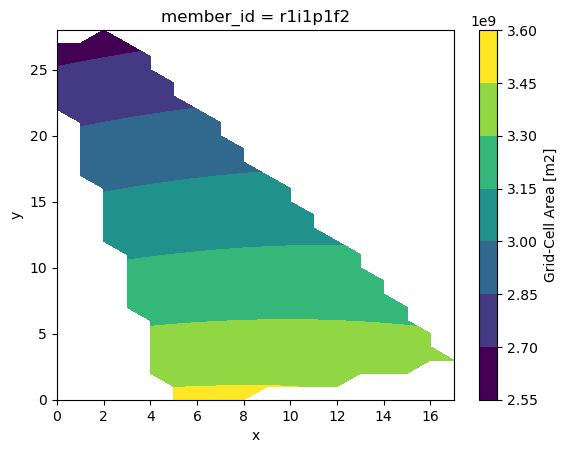

In [60]:
GLarea.plot.contourf()

## Import sic data

In [9]:
cat2 = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon'], 
                 variable_id=['siconc']) 
                 #member_id=['r1i1p1f1'])
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r11i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200408


In [10]:
# Create dictionary from the list of datasets we found
dsi_dict = cat2.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [11]:
si = dsi_dict[list(dsi_dict.keys())[0]]

In [12]:
si

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, member_id: 6, time: 1980,
                  axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type         |S255 ...
  * member_id    (member_id) <U9 'r1i1p1f2' 'r3i1p1f2' ... 'r11i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    siconc       (member_id, time, y, x) float32 dask.array<chunksize=(1, 600, 294, 362), meta=np.ndarray>
Attributes: (12/48)
    institution:             CNRM (Centre National de Recherches Meteorologiq...
    xios_commit:             1442-shuffle
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f2
    contact:                 contact.cmip@meteo.fr
    ...                      ...
    external_variables:      areacello
    parent_experiment_id:    piControl
    sub_experiment:          none
    activity_id:             CMIP
    nemo_gelato_commit:      49095b3accd5d4c_6524fe19b00467a
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn

## Average over ensemble means

In [14]:
# average over the ensemble means
si_mean = si.mean(dim = ['member_id'], keep_attrs=True)
si_mean

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type         |S255 ...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    siconc       (time, y, x) float32 dask.array<chunksize=(600, 294, 362), meta=np.ndarray>
Attributes: (12/48)
    institution:             CNRM (Centre National de Recherches Meteorologiq...
    xios_commit:             1442-shuffle
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f2
    contact:                 contact.cmip@meteo.fr
    ...                      ...
    external_variables:      areacello
    parent_experiment_id:    piControl
    sub_experiment:          none
    activity_id:             CMIP
    nemo_gelato_commit:      49095b3accd5d4c_6524fe19b00467a
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn

In [15]:
si_GL = si_mean.where((si_mean.lon>=-10) & (si_mean.lon<=10) & (si_mean.lat <=85 )  & (si_mean.lat >= 70),drop = True)
si_GL

<xarray.Dataset>
Dimensions:      (time: 1980, y: 29, x: 18, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(29, 18, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(29, 18, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type         |S6 b'typesi'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    siconc       (time, y, x) float32 dask.array<chunksize=(600, 29, 18), meta=np.ndarray>
Attributes: (12/48)
    institution:             CNRM (Centre National de Recherches Meteorologiq...
    xios_commit:             1442-shuffle
    grid:                    native ocean tri-polar grid with 105 k ocean cells
    mip_era:                 CMIP6
    parent_variant_label:    r1i1p1f2
    contact:                 contact.cmip@meteo.fr
    ...                      ...
    external_variables:      areacello
    parent_experiment_id:    piControl
    sub_experiment:          none
    activity_id:             CMIP
    nemo_gelato_commit:      49095b3accd5d4c_6524fe19b00467a
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn

In [16]:
si_mon = si_GL.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


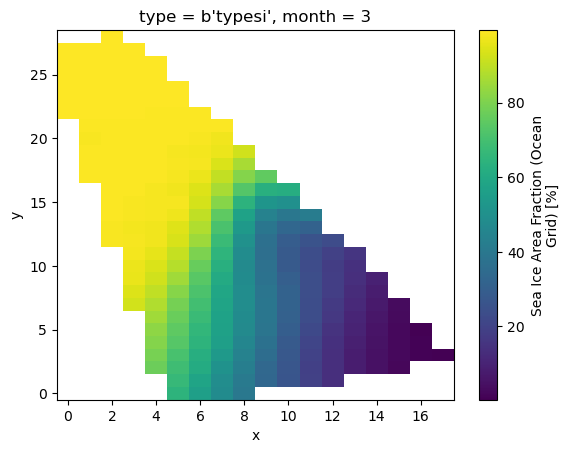

In [30]:
si_mon['siconc'].sel(month = 3).plot.pcolormesh()

In [27]:
si_mon['siconc'].sel(month = 3).values

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


array([[        nan,         nan,         nan,         nan,         nan,
        64.58574219, 55.77400568, 47.62137192, 40.0691643 ,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
        66.54898793, 58.25660511, 48.52111151, 40.78122633, 33.11084576,
        26.57977628, 19.64059837, 13.75889264,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan, 77.25617306,
        68.56400923, 60.92256155, 50.91646544, 42.17550012, 33.55685369,
        26.70353338, 19.30757872, 13.63112275,  8.1528128 ,  4.64281487,
         2.28877027,         nan,         nan],
       [        nan,         nan,         nan,         nan, 79.10320194,
        70.61638849, 62.59997041, 53.41691525, 43.96605114, 35.24415542,
        27.39746686, 19.94108073, 13.68687411,  8.385

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


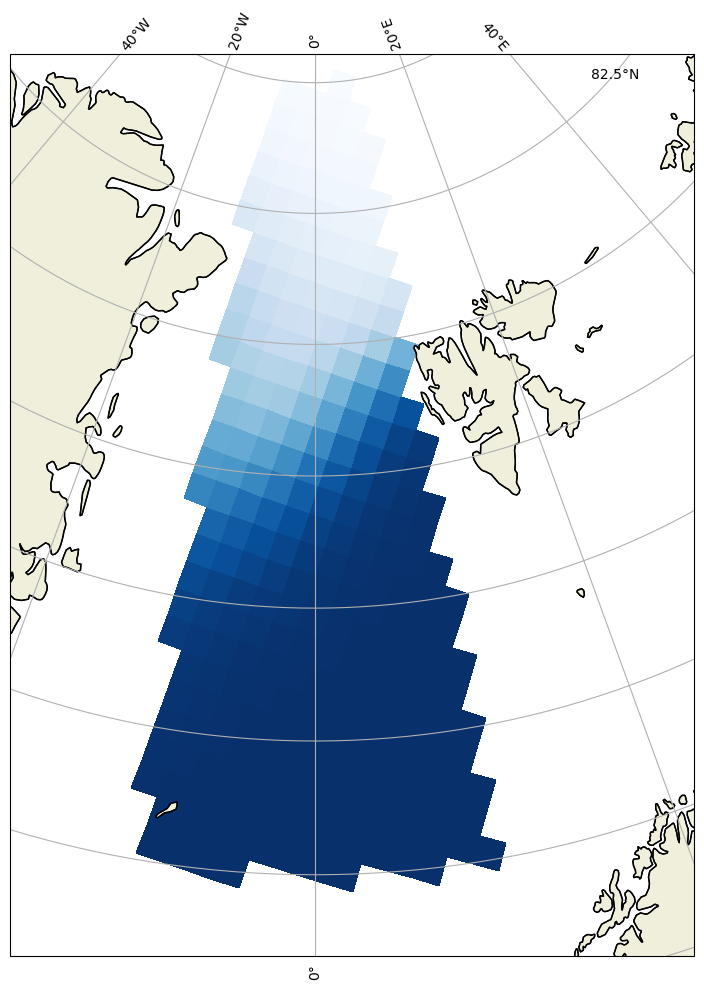

In [37]:
extent = [-10,10,85,70]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

ax.pcolormesh(si_mon.lon,si_mon.lat, si_mon['siconc'].sel(month = 8),
#si_mon['siconc'].sel(month = 3).plot.pcolormesh(
#    ax = ax, x = si_mon.lon, y = si_mon.lat,
#    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
     transform=ccrs.PlateCarree(),
    #transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
    # levels=10,
        )
#ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Area weighted average

In [64]:
si_weighted = (GLarea*si_GL).sum(dim=('x','y'))/GLarea.sum(dim=('x','y'))

In [65]:
si_weighted

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U9 'r1i1p1f2'
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type       |S6 b'typesi'

In [75]:
#fig = plt.figure(1, figsize=[10,5])
#si_weighted.plot(x='time')
si_year = si_weighted.groupby('time.year').mean(dim = ["time"],keep_attrs=True)

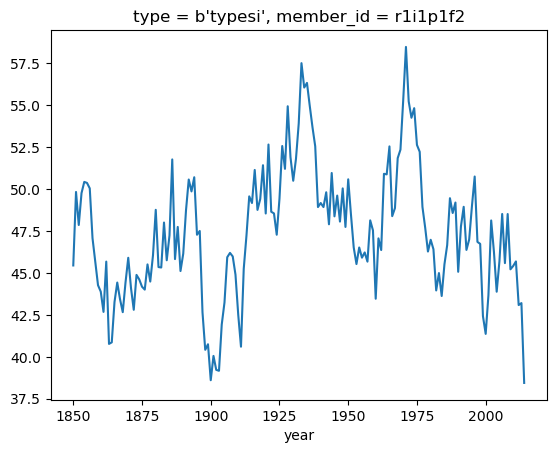

In [76]:
si_year.plot()

In [69]:
si_monthly = si_weighted.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

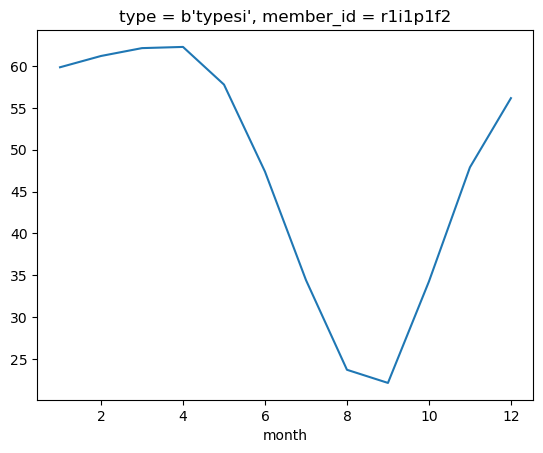

In [72]:
si_monthly.plot()